# Employee Attrition Predictor

In [1]:
!wget general_data.csv https://raw.githubusercontent.com/nikhilraphi07/DS_Analytics/master/general_data.csv

--2019-11-10 23:36:44--  http://general_data.csv/
Resolving general_data.csv (general_data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘general_data.csv’
--2019-11-10 23:36:44--  https://raw.githubusercontent.com/nikhilraphi07/DS_Analytics/master/general_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549994 (537K) [text/plain]
Saving to: ‘general_data.csv’

100%[======================================>] 549,994     --.-K/s   in 0.02s   

2019-11-10 23:36:44 (24.2 MB/s) - ‘general_data.csv’ saved [549994/549994]

FINISHED --2019-11-10 23:36:44--
Total wall clock time: 0.5s
Downloaded: 1 files, 537K in 0.02s (24.2 MB/s)


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("general_data.csv", sep=',')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


# Data Cleaning 

In [5]:
df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [6]:
df.fillna(0,inplace=True)
df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [7]:
#Now we remove the columns which doesnot provide any significant information:

df.drop(['EmployeeCount','StandardHours','EmployeeID'],axis=1, inplace = True)

# Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
# Now we determine the correlation between each columns

correlation_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

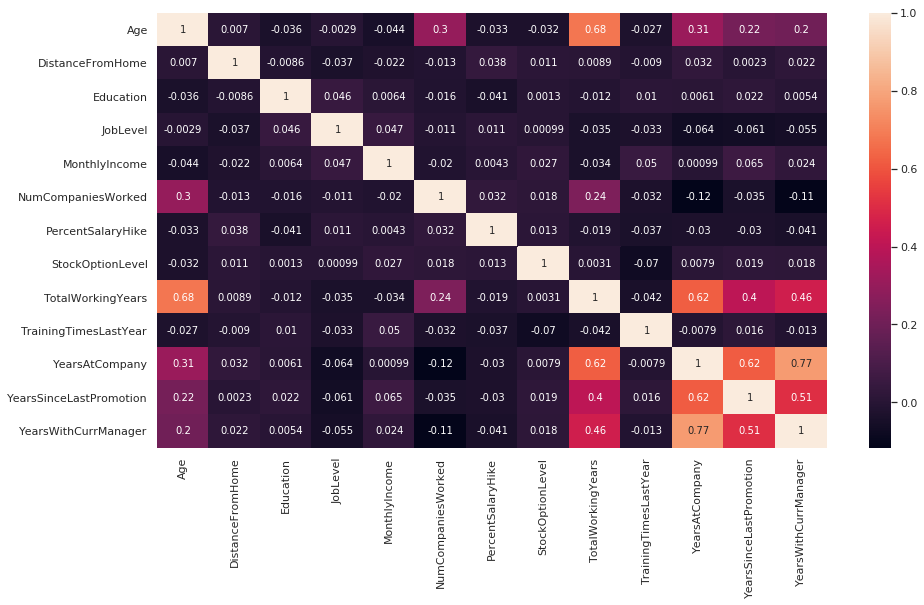

In [10]:
cor = correlation_cols.corr()
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot=True)
plt.show()

In [11]:
print(len(df))
print(len(df[df['Attrition']=='Yes']))
print(len(df[df['Attrition']=='No']))
print("The Attrition percentage for yes is:",(len(df[df['Attrition']=='Yes'])/len(df))*100,"%")
print("The Attrition percentage for no is:",(len(df[df['Attrition']=='No'])/len(df))*100,"%")

4410
711
3699
The Attrition percentage for yes is: 16.122448979591837 %
The Attrition percentage for no is: 83.87755102040816 %


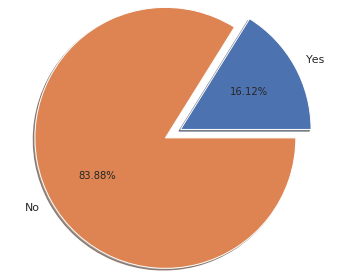

In [12]:
chart_values=[711,3699]
chart_labels=["Yes","No"]
#explode =[0,0,0,0.2,0]
plt.axis("equal")
plt.pie(chart_values,labels=chart_labels,radius=1.5,shadow=True,autopct='%0.02f%%',explode=[0,0.2])#startangle =90
plt.show()

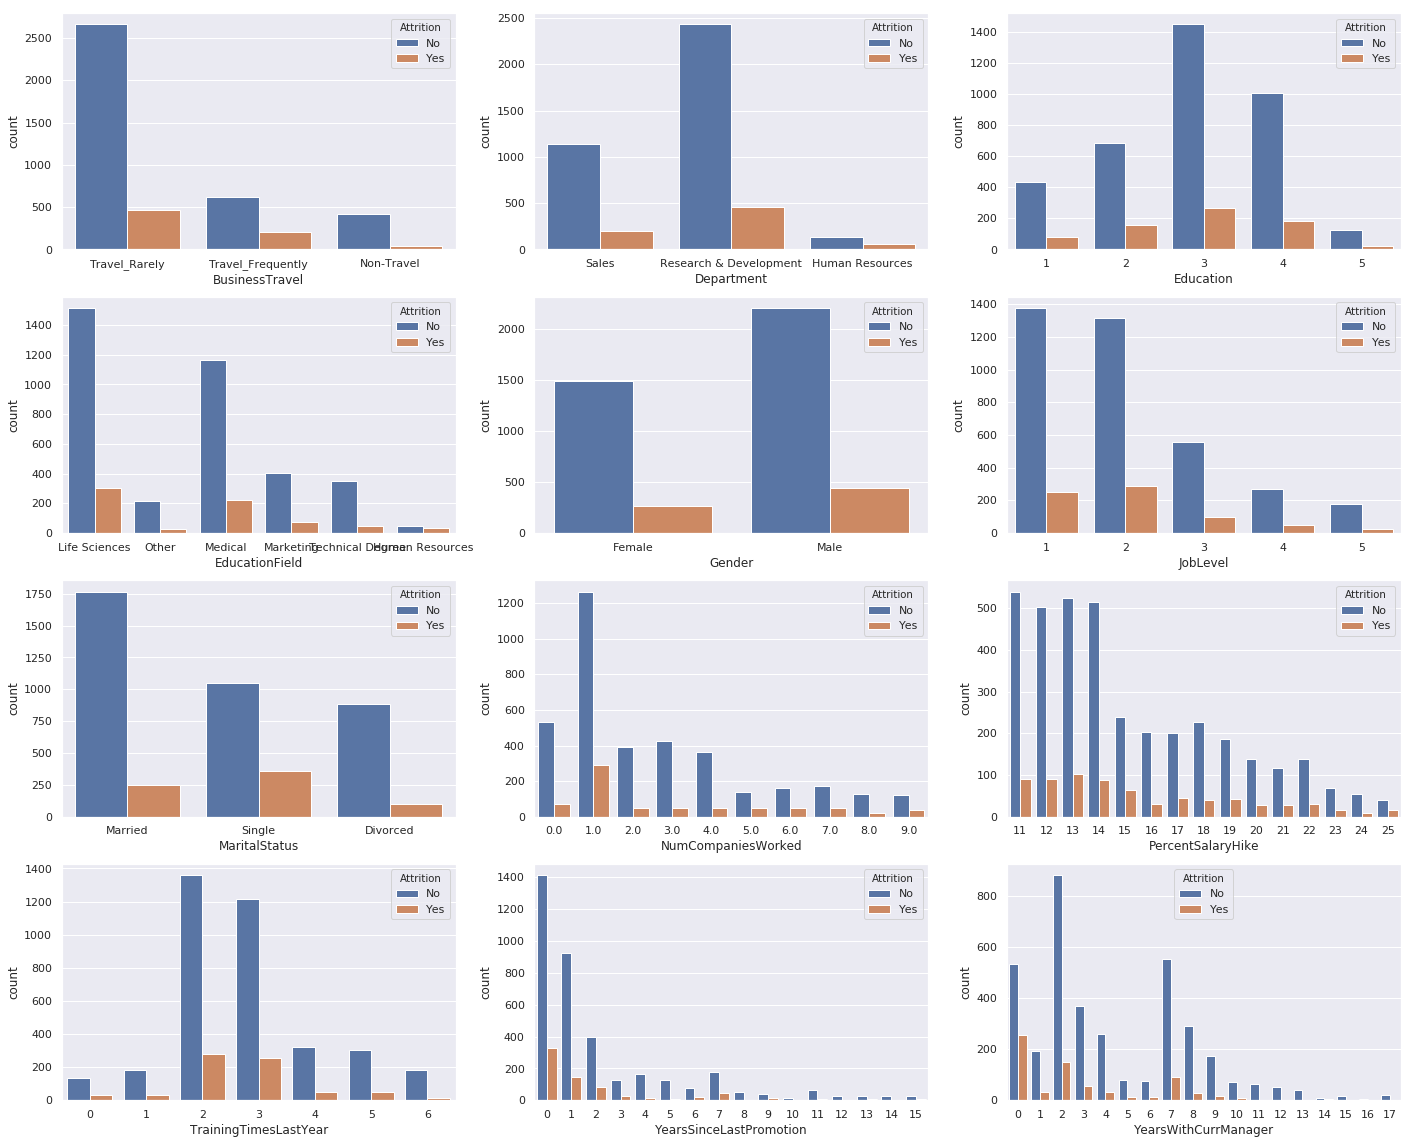

In [13]:
feature_category = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel',  'MaritalStatus', 'NumCompaniesWorked', 'PercentSalaryHike'
           ,  'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
i = 0
j = 0
fig, ax = plt.subplots(4,3,  figsize=(24,20))
for feature in feature_category:
    sns.countplot(x=feature, hue='Attrition', data=df, ax = ax[i,j])
    j = j + 1
    if j > 2:
        j = 0
        i = i + 1 

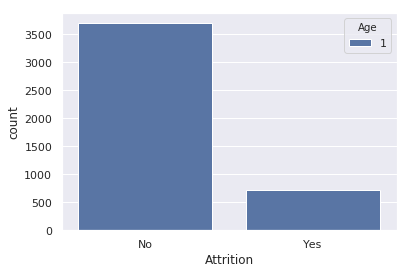

In [15]:
#Now since the age columns contains too many unique values we divide the data into categories for better visualization
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(df); 

sns.countplot(x = "Attrition",data=df,hue="Age")
plt.show()

## Observation:

#### 1. It was observed that employees who used to travel frequently had more chances of leaving the company
#### 2. Majority of the people who left where from the R&D group, which indicates some changes needs to be implemented in that sector
#### 3. Employees who are not married have a higher tendency to leave the company.
#### 4. For employees having their salary hike % within range of 11-14 % leave the company early
#### 5. For people whom this is their second company are most likely to leave
#### 6. If an employee promotion is pending from almost 6-7 years, he is likely to leave.
#### 7. People who are less than 30 years of age have the most tendency to leave the company.

### Convert all the Categorical data into numerical data

In [16]:
print(df['BusinessTravel'].unique())
print(df['Department'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())
print(df['Over18'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['Y']


In [17]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['BusinessTravel'] = labelEncoder_X.fit_transform(df['BusinessTravel'])
df['Department'] = labelEncoder_X.fit_transform(df['Department'])
df['EducationField'] = labelEncoder_X.fit_transform(df['EducationField'])
df['Gender'] = labelEncoder_X.fit_transform(df['Gender'])
df['JobRole'] = labelEncoder_X.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelEncoder_X.fit_transform(df['MaritalStatus'])
df['Over18'] = labelEncoder_X.fit_transform(df['Over18'])

In [18]:
#Attriton is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
df['Attrition']=label_encoder_y.fit_transform(df['Attrition'])

In [19]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,2,2,6,2,1,0,1,0,...,131160,1.0,0,11,0,1.0,6,1,0,0
1,1,1,1,1,10,1,1,0,1,6,...,41890,0.0,0,23,1,6.0,3,5,1,4
2,1,0,1,1,17,4,4,1,4,7,...,193280,1.0,0,15,3,5.0,2,5,0,3
3,1,0,0,1,2,5,1,1,3,1,...,83210,3.0,0,11,3,13.0,5,8,7,5
4,1,0,2,1,10,1,3,1,1,7,...,23420,4.0,0,12,2,9.0,2,6,0,4


In [20]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

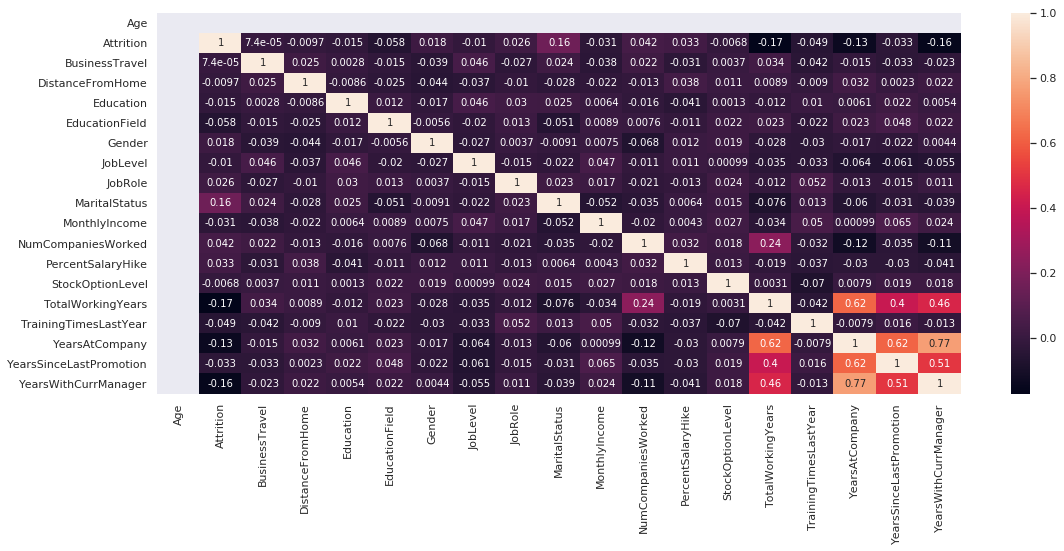

In [21]:
corr = corr_cols.corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr, annot = True)
plt.show()

In [22]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 
       'TrainingTimesLastYear', 'YearsSinceLastPromotion']]

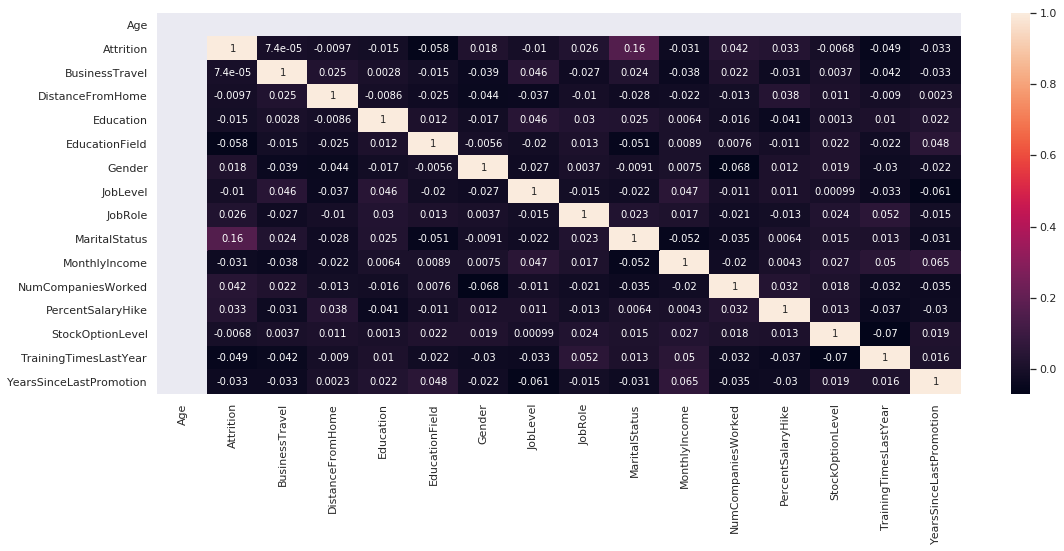

In [23]:
corr = corr_cols.corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr, annot = True)
plt.show()

# DATA MODELING

In [28]:
# Choose dependent and independent var:

# Here dependent var is Attrition and rest of the var are indepdent var.

In [24]:
y = df['Attrition']
x = df.drop('Attrition', axis = 1)

# Logistic Regression:

In [25]:
# Split the data into training and test set:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [27]:
from sklearn.linear_model import LogisticRegression

#instantiate the model 
lreg = LogisticRegression(solver='liblinear')

# fit the model with data
lreg.fit(X_train,y_train)

# predict the response of the test dataset
#print(*y_test, sep = ", ")  
y_pred = lreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
#import some comman libraries:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

#Model Accuracy & Confusion Matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8367346938775511
[[732   9]
 [135   6]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       741
           1       0.40      0.04      0.08       141

   micro avg       0.84      0.84      0.84       882
   macro avg       0.62      0.52      0.49       882
weighted avg       0.77      0.84      0.78       882



## Decision Tree:

In [30]:
#split dataset in features and target variable
feature_cols = ['Age','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
X = df[feature_cols] # Features
y = df.Attrition # Target variable

In [31]:
# Splitting the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [32]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dcl = DecisionTreeClassifier()

# Train Decision Tree Classifer and fit the data
dcl = dcl.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dcl.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
# Model Accuracy & Confusion Matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
con = confusion_matrix(y_test, y_pred)
con

Accuracy: 0.9765684051398337


array([[1113,   18],
       [  13,  179]])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1131
           1       0.91      0.93      0.92       192

   micro avg       0.98      0.98      0.98      1323
   macro avg       0.95      0.96      0.95      1323
weighted avg       0.98      0.98      0.98      1323



## Random Forest:

In [35]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

fea_cols = ['Age','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']  
X = df[fea_cols] # Features
y = df.Attrition # Target variable

In [36]:
# Splitting the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=1000, criterion='gini')

#Train the model using the training sets and fitting the data
rf.fit(X_train,y_train)

# Predicting the response 
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

con_rf = confusion_matrix(y_test, y_pred)
con_rf

Accuracy: 0.9909297052154195


array([[1102,    0],
       [  12,  209]])

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1102
           1       1.00      0.95      0.97       221

   micro avg       0.99      0.99      0.99      1323
   macro avg       0.99      0.97      0.98      1323
weighted avg       0.99      0.99      0.99      1323



# Evaluating the Model Performance:

In [40]:
#K Fold Cross Validation for logistic Regression
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lreg, X=X_train, y = y_train, cv = 10)
accuracies.mean()

0.8412694910267726

In [41]:
#K Fold Cross Validation for Descision Tree
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dcl, X=X_train, y = y_train, cv = 10)
accuracies.mean()

0.957884671962342

In [42]:
#K Fold Cross Validation for Random Forest 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rf, X=X_train, y = y_train, cv = 10)
accuracies.mean()

0.9782961375194386

# Conclusion:

### Below mentioned are the models that we used with their accuracy

#### Logistic Regression: 0.8367346938775511
#### Decision Tree: 0.9765684051398337
#### Random Forest: 0.9909297052154195

### The performance evaluation for each of these models are:

#### Logistic Regression: 0.8412694910267726
#### Decision Tree: 0.957884671962342
#### Random Forest: 0.9782961375194386

##### Here we could see that Random Forest gives the best estimation regarding the "Attribution" factor of an employee and based on the parameters contributing to it the required changes could be brought in to the existing company structure to reduce the attrition % of the employees working with them.

##### Also based on their performance evaluation we could se sure that the even for an unknown dataset the accuracy would remain almost the same and hence this model could be said to be suited for any generalized data set.